In [20]:
import pandas as pd

# CSV ÌååÏùº ÏùΩÍ∏∞
df_energy = pd.read_csv('ÌïúÍµ≠ÏÑúÎ∂ÄÎ∞úÏ†Ñ_ÏãúÍ∞ÑÎ≥Ñ_Î∞úÏ†ÑÎüâ_utf-8_20230630.csv')
df_energy = df_energy.rename(columns={
    'Î∞úÏ†ÑÍ∏∞Î™Ö': 'Î∞úÏ†ÑÍµ¨Î∂Ñ',
    'ÎÖÑÏõîÏùº': 'ÏùºÏûê',
    'Ìï¥Îãπ ÏãúÍ∞Ñ Î∞úÏ†ÑÎüâ(kWh)': 'Î∞úÏ†ÑÎüâ(Wh)'
})

# ÏùºÏûê ÌòïÏãùÏù¥ datetimeÏù¥Ïñ¥Ïïº Ìï®
df_energy['ÏùºÏûê'] = pd.to_datetime(df_energy['ÏùºÏûê'])

# Î≥ÄÌôò ÎåÄÏÉÅ Í∏∞Í∞Ñ ÎßàÏä§ÌÅ¨
mask = (df_energy['ÏùºÏûê'] >= '2021-09-01') & (df_energy['ÏùºÏûê'] <= '2022-07-31')

# Ìï¥Îãπ Í∏∞Í∞ÑÏóêÎßå Î∞úÏ†ÑÎüâ * 1000
df_energy.loc[mask, 'Î∞úÏ†ÑÎüâ(Wh)'] = df_energy.loc[mask, 'Î∞úÏ†ÑÎüâ(Wh)'] * 1000

# 1. Î∞úÏ†ÑÎüâ(Wh) ‚Üí Î∞úÏ†ÑÎüâ(kWh)Î°ú ÌôòÏÇ∞
df_energy['Î∞úÏ†ÑÎüâ(kWh)'] = df_energy['Î∞úÏ†ÑÎüâ(Wh)'] / 1000

# 2. Í∏∞Ï°¥ Wh Ïª¨Îüº Ï†úÍ±∞ (ÏÑ†ÌÉù)
df_energy = df_energy.drop(columns=['Î∞úÏ†ÑÎüâ(Wh)'])

df_energy['ÏãúÍ∞Ñ'] = df_energy['ÏãúÍ∞Ñ'].str.replace('Ïãú', '', regex=False).astype(int)
df_energy.head()

df_energy.to_csv('df_energy_solar2.csv', index=False, encoding='utf-8-sig')

In [24]:
# Ï§ÄÍ≥µÏó∞ÎèÑ Ïó¥ ÏÉùÏÑ± (Í∏∞Î≥∏Í∞í: None)
df_energy["Ï§ÄÍ≥µÏó∞ÎèÑ"] = None

# Î∞úÏ†ÑÏÜåÎ≥Ñ Ï§ÄÍ≥µÏó∞ÎèÑ Ìï†Îãπ
df_energy.loc[df_energy["Î∞úÏ†ÑÍµ¨Î∂Ñ"] == "ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë", "Ï§ÄÍ≥µÏó∞ÎèÑ"] = "'12.6"
df_energy.loc[df_energy["Î∞úÏ†ÑÍµ¨Î∂Ñ"] == "ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë", "Ï§ÄÍ≥µÏó∞ÎèÑ"] = "'12.8"
df_energy.loc[df_energy["Î∞úÏ†ÑÍµ¨Î∂Ñ"] == "ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb", "Ï§ÄÍ≥µÏó∞ÎèÑ"] = "'12.12"

In [25]:
import pandas as pd

# ÏùºÏûêÏôÄ Ï§ÄÍ≥µÏó∞ÎèÑ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df_energy['ÏùºÏûê'] = pd.to_datetime(df_energy['ÏùºÏûê'])

# Ï§ÄÍ≥µÏó∞ÎèÑ Î¨∏ÏûêÏó¥ÏóêÏÑú Ïó∞ÎèÑÏôÄ Ïõî Ï∂îÏ∂ú ('12.12 ‚Üí 2012, 12)
df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ_Ïó∞'] = df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ'].str.extract(r"'(\d+)\.")[0].astype(int) + 2000
df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ_Ïõî'] = df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ'].str.extract(r"\.(\d+)")[0].astype(int)

# Ï§ÄÍ≥µÏùº full datetime ÏÉùÏÑ±
df_energy['Ï§ÄÍ≥µÏùº'] = pd.to_datetime(dict(year=df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ_Ïó∞'], month=df_energy['Ï§ÄÍ≥µÏó∞ÎèÑ_Ïõî'], day=1))

# Ïó∞Ïãù Í≥ÑÏÇ∞: ÎÇ†Ïßú Ï∞®Ïù¥ / 365.25ÏùºÎ°ú ÌôòÏÇ∞ ‚Üí ÏÜåÏàòÏ†ê Ïó∞ÎèÑ Îã®ÏúÑ
df_energy['Ïó∞Ïãù(ÎÖÑ)'] = (df_energy['ÏùºÏûê'] - df_energy['Ï§ÄÍ≥µÏùº']).dt.days / 365.25

# üëâ ÏÜåÏàòÏ†ê Ï≤´Ïß∏ ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º
df_energy['Ïó∞Ïãù(ÎÖÑ)'] = df_energy['Ïó∞Ïãù(ÎÖÑ)'].round(1)

# Ï§ëÍ∞Ñ Ïª¨Îüº Ï†ïÎ¶¨ (ÏÑ†ÌÉù)
df_energy = df_energy.drop(columns=['Ï§ÄÍ≥µÏó∞ÎèÑ_Ïó∞', 'Ï§ÄÍ≥µÏó∞ÎèÑ_Ïõî', 'Ï§ÄÍ≥µÏùº'])

df_energy = df_energy.drop(columns=['Ï§ÄÍ≥µÏó∞ÎèÑ'])
# ÌôïÏù∏
df_energy.head()




Î∞úÏ†ÑÍµ¨Î∂Ñ         ÏùºÏûê  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ)
0  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë 2017-01-01     1.628   1       0.0    4.6
1    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë 2017-01-01     1.490   1       0.0    4.4
2     ÏòÅÏïîÏóêÌîÑÏõêÌÉúÏñëÍ¥ëb 2017-01-01    13.296   1       0.0    4.1
3  ÏÑ∏Ï¢ÖÏãúÌèêÍ∏∞Î¨ºÎß§Î¶ΩÏû•ÌÉúÏñëÍ¥ë 2017-01-02     1.628   1       0.0    4.6
4    ÏïàÏÇ∞Ïó∞ÏÑ±Ï†ïÏàòÏû•ÌÉúÏñëÍ¥ë 2017-01-02     1.490   1       0.0    4.4

### EDA

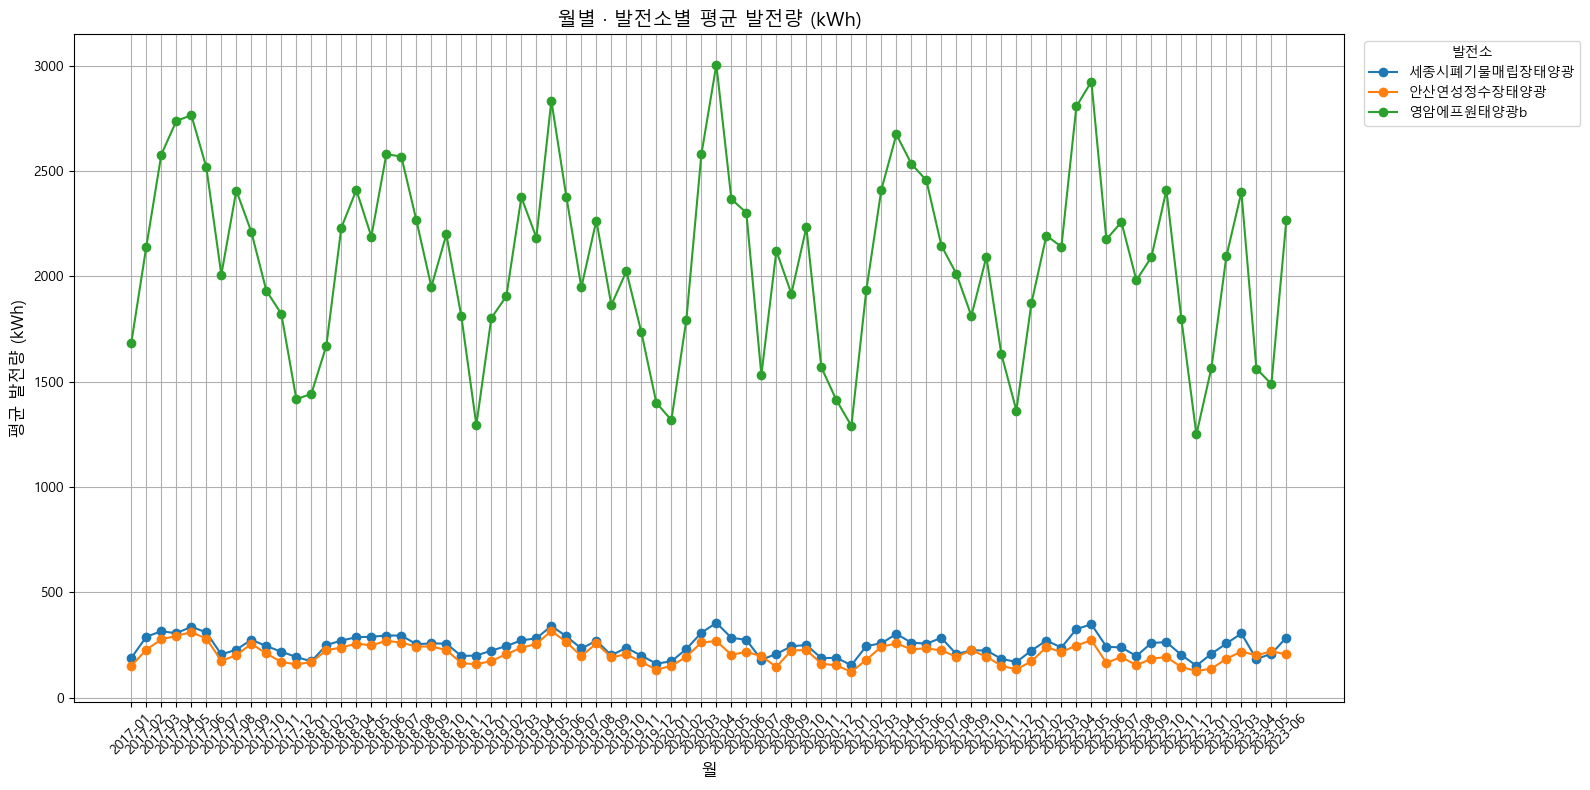

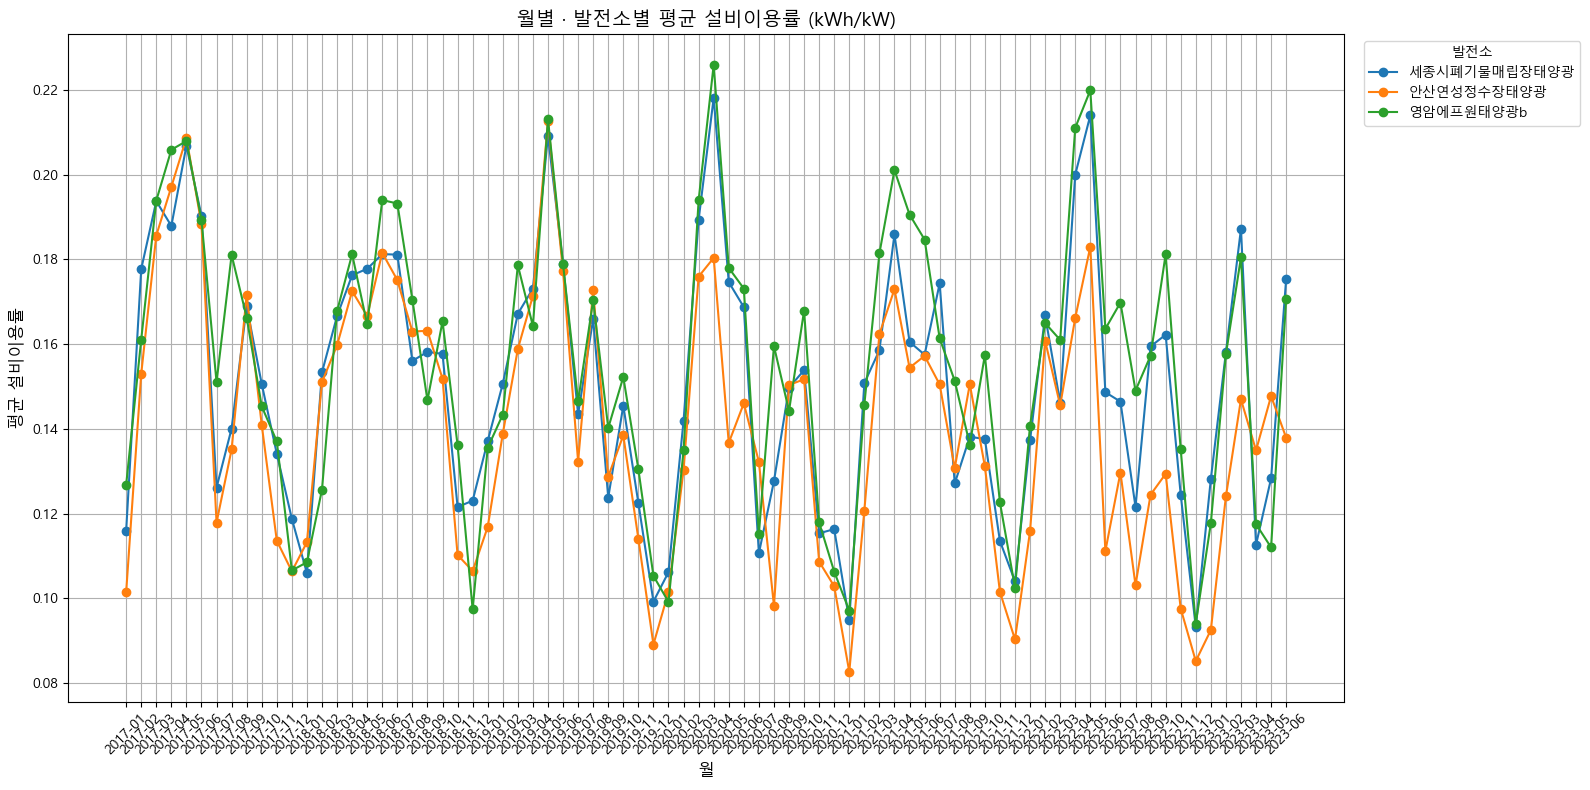

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ 1. CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = 'ÌïúÍµ≠ÏÑúÎ∂ÄÎ∞úÏ†Ñ_ÏãúÍ∞ÑÎ≥Ñ_Î∞úÏ†ÑÎüâ_utf-8_20230630.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

df = df.rename(columns={
    'Î∞úÏ†ÑÍ∏∞Î™Ö': 'Î∞úÏ†ÑÍµ¨Î∂Ñ',
    'ÎÖÑÏõîÏùº': 'ÏùºÏûê',
    'Ìï¥Îãπ ÏãúÍ∞Ñ Î∞úÏ†ÑÎüâ(kWh)': 'Î∞úÏ†ÑÎüâ(Wh)'
})

# ÏùºÏûê ÌòïÏãùÏù¥ datetimeÏù¥Ïñ¥Ïïº Ìï®
df['ÏùºÏûê'] = pd.to_datetime(df['ÏùºÏûê'])

# Î≥ÄÌôò ÎåÄÏÉÅ Í∏∞Í∞Ñ ÎßàÏä§ÌÅ¨
mask = (df['ÏùºÏûê'] >= '2021-09-01') & (df['ÏùºÏûê'] <= '2022-07-31')

# Ìï¥Îãπ Í∏∞Í∞ÑÏóêÎßå Î∞úÏ†ÑÎüâ * 1000
df.loc[mask, 'Î∞úÏ†ÑÎüâ(Wh)'] = df.loc[mask, 'Î∞úÏ†ÑÎüâ(Wh)'] * 1000

# 1. Î∞úÏ†ÑÎüâ(Wh) ‚Üí Î∞úÏ†ÑÎüâ(kWh)Î°ú ÌôòÏÇ∞
df['Î∞úÏ†ÑÎüâ(kWh)'] = df['Î∞úÏ†ÑÎüâ(Wh)'] / 1000

# 2. Í∏∞Ï°¥ Wh Ïª¨Îüº Ï†úÍ±∞ (ÏÑ†ÌÉù)
df = df.drop(columns=['Î∞úÏ†ÑÎüâ(Wh)'])

df['ÏãúÍ∞Ñ'] = df['ÏãúÍ∞Ñ'].str.replace('Ïãú', '', regex=False).astype(int)

# ‚úÖ 2. ÎÇ†Ïßú Î≥ÄÌôò Î∞è Ïõî Ïª¨Îüº ÏÉùÏÑ±
df['ÏùºÏûê'] = pd.to_datetime(df['ÏùºÏûê'])
df['Ïõî'] = df['ÏùºÏûê'].dt.to_period('M')

# ‚úÖ 3. Î∞úÏ†ÑÏÜå Ïª¨Îüº ÏÉùÏÑ±
df['Î∞úÏ†ÑÏÜå'] = df['Î∞úÏ†ÑÍµ¨Î∂Ñ']

# ‚úÖ 4. Î∞úÏ†ÑÎüâ Í∏∞Î∞ò ÏõîÎ≥Ñ ÌèâÍ∑†
monthly_avg = df.groupby(['Ïõî', 'Î∞úÏ†ÑÏÜå'])['Î∞úÏ†ÑÎüâ(kWh)'].mean().reset_index()

# ‚úÖ 5. ÏÑ§ÎπÑÏù¥Ïö©Î•† Í≥ÑÏÇ∞ (kWh / (MW * 1000))
df['ÏÑ§ÎπÑÏù¥Ïö©Î•†'] = df['Î∞úÏ†ÑÎüâ(kWh)'] / (df['ÏÑ§ÎπÑÏö©Îüâ(MW)']*1000)
monthly_util = df.groupby(['Ïõî', 'Î∞úÏ†ÑÏÜå'])['ÏÑ§ÎπÑÏù¥Ïö©Î•†'].mean().reset_index()

# ‚úÖ 6. Í∑∏ÎûòÌîÑ 1: ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† Î∞úÏ†ÑÎüâ
plt.figure(figsize=(16, 8))
for name, group in monthly_avg.groupby('Î∞úÏ†ÑÏÜå'):
    plt.plot(group['Ïõî'].astype(str), group['Î∞úÏ†ÑÎüâ(kWh)'], marker='o', label=name)

plt.title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=14)
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('ÌèâÍ∑† Î∞úÏ†ÑÎüâ (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ‚úÖ 7. Í∑∏ÎûòÌîÑ 2: ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•†
plt.figure(figsize=(16, 8))
for name, group in monthly_util.groupby('Î∞úÏ†ÑÏÜå'):
    plt.plot(group['Ïõî'].astype(str), group['ÏÑ§ÎπÑÏù¥Ïö©Î•†'], marker='o', label=name)

plt.title('ÏõîÎ≥Ñ ¬∑ Î∞úÏ†ÑÏÜåÎ≥Ñ ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•† (kWh/kW)', fontsize=14)
plt.xlabel('Ïõî', fontsize=12)
plt.ylabel('ÌèâÍ∑† ÏÑ§ÎπÑÏù¥Ïö©Î•†', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Î∞úÏ†ÑÏÜå', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Í∏∞ÏÉÅÏ≤≠ API Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [33]:
import requests
import ssl
from requests.adapters import HTTPAdapter
from urllib3.poolmanager import PoolManager

class SSLAdapter(HTTPAdapter):
    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)

    def init_poolmanager(self, *args, **kwargs):
        kwargs['ssl_context'] = self.ssl_context
        return super().init_poolmanager(*args, **kwargs)

# TLS 1.2 Ïù¥ÏÉÅÏùò context Í∞ïÏ†ú ÏÑ§Ï†ï
context = ssl.create_default_context()
context.set_ciphers('DEFAULT@SECLEVEL=1')  # ÎÇÆÏùÄ Î≥¥Ïïà Î†àÎ≤® ÌóàÏö©Ìï† Í≤ΩÏö∞

session = requests.Session()
session.mount('https://', SSLAdapter(context))

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"
params = {
    "serviceKey": "zJLFmDMckurk+au32kOHTxsrU5gG2NAadNE68xYaBW8PBJtdXN7F4QEpuW6f68GL0qLcMQsmgyPHxbOs43NCBA==",
    "numOfRows": "1000",
    "pageNo": "1",
    "dataType": "JSON",
    "base_date": "20250627",
    "base_time": "0500",
    "nx": "55",
    "ny": "127"
}
response = session.get(url, params=params)
print(response.json())


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'baseDate': '20250627', 'baseTime': '0500', 'category': 'TMP', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '20', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'UUU', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.1', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'VVV', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.4', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'VEC', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '194', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'WSD', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '0.4', 'nx': 55, 'ny': 127}, {'baseDate': '20250627', 'baseTime': '0500', 'category': 'SKY', 'fcstDate': '20250627', 'fcstTime': '0600', 'fcstValue': '4', 

In [34]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# ----------------------------------------------------------------------
# 1. API Ìò∏Ï∂úÏùÑ ÏúÑÌïú Í∏∞Î≥∏ ÏÑ§Ï†ï
# ----------------------------------------------------------------------

now = datetime.now()
if now.hour < 5:
    base_date = (now - timedelta(days=1)).strftime('%Y%m%d')
else:
    base_date = now.strftime('%Y%m%d')

url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"
serviceKey = "zJLFmDMckurk+au32kOHTxsrU5gG2NAadNE68xYaBW8PBJtdXN7F4QEpuW6f68GL0qLcMQsmgyPHxbOs43NCBA=="  # Î≥∏Ïù∏Ïùò ÏÑúÎπÑÏä§ ÌÇ§Î°ú Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî

# ----------------------------------------------------------------------
# 2. Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©Ìï¥ Î™®Îì† ÌéòÏù¥ÏßÄÏùò Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
# ----------------------------------------------------------------------

all_items = []
page_no = 1
num_of_rows = 5000

print("Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")

while True:
    print(f" - {page_no} ÌéòÏù¥ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏöîÏ≤≠ Ï§ë...")
    
    params = {
        'serviceKey': serviceKey,
        'numOfRows': str(num_of_rows),
        'pageNo': str(page_no),
        'dataType': 'JSON',
        'base_date': base_date,
        'base_time': '0500',
        'nx': '55',
        'ny': '127'
    }

    try:
        response = requests.get(url, params=params, timeout=10)
        response.raise_for_status()

        data = response.json()
        
        if data['response']['header']['resultCode'] != '00':
            print(f"‚ùå API ÏóêÎü¨ ÏùëÎãµ: {data['response']['header']['resultMsg']}")
            break

        items = data['response']['body']['items'].get('item', [])
        all_items.extend(items)

        if len(items) < num_of_rows:
            print(f"ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄ({page_no})ÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏôÑÎ£åÌï©ÎãàÎã§.")
            break

        page_no += 1

    except requests.exceptions.RequestException as e:
        print(f"‚ùå ÎÑ§Ìä∏ÏõåÌÅ¨ ÎòêÎäî HTTP ÏóêÎü¨ Î∞úÏÉù: {e}")
        break
    except requests.exceptions.JSONDecodeError:
        print("‚ùå JSON ÌååÏã± ÏóêÎü¨: ÏÑúÎ≤Ñ ÏùëÎãµÏù¥ Ïú†Ìö®Ìïú JSONÏù¥ ÏïÑÎãôÎãàÎã§.")
        print(f"--- ÏÑúÎ≤Ñ Ïã§Ï†ú ÏùëÎãµ (Status: {response.status_code}) ---")
        print(response.text)
        break
    except KeyError:
        print("‚ùå Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÏóêÎü¨: ÏùëÎãµ Î∞õÏùÄ JSONÏùò ÌÇ§Í∞Ä ÏòàÏÉÅÍ≥º Îã§Î¶ÖÎãàÎã§.")
        print("--- ÏÑúÎ≤Ñ Ïã§Ï†ú ÏùëÎãµ ---")
        print(data)
        break

# ----------------------------------------------------------------------
# 3. ÏàòÏßëÎêú Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º Ìëú(DataFrame)Î°ú Î≥ÄÌôò Î∞è Ï∂úÎ†•
# ----------------------------------------------------------------------

if all_items:
    df = pd.DataFrame(all_items)
    df.drop_duplicates(inplace=True)
    
    print(f"\nÏ¥ù {len(df)}Í∞úÏùò Ïú†ÎãàÌÅ¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ÌëúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.")

    # fcstDateÏôÄ fcstTimeÏùÑ Ïù∏Îç±Ïä§Î°ú ÏßÄÏ†ïÌïòÏó¨ pivot_table ÏÉùÏÑ±
    pivot_df = df.pivot_table(
        index=['fcstDate', 'fcstTime'], 
        columns='category', 
        values='fcstValue', 
        aggfunc='first'
    ).reset_index()

    desired_order = ['fcstDate', 'fcstTime', 'TMP', 'SKY', 'PTY', 'POP', 'PCP', 'REH', 'WSD', 'SNO']
    current_columns = [col for col in desired_order if col in pivot_df.columns]
    remaining_columns = [col for col in pivot_df.columns if col not in current_columns]
    pivot_df = pivot_df[current_columns + remaining_columns]

    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)

    print("\n--- Í∏∞ÏÉÅÏ≤≠ Îã®Í∏∞ÏòàÎ≥¥ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞, ÎÇ†Ïßú Ìè¨Ìï®) ---")
    print(pivot_df)
else:
    print("\nÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. ÏÑúÎπÑÏä§ ÌÇ§ ÎòêÎäî ÏöîÏ≤≠ ÌååÎùºÎØ∏ÌÑ∞Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")


Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
 - 1 ÌéòÏù¥ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏöîÏ≤≠ Ï§ë...
ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄ(1)ÏûÖÎãàÎã§. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏùÑ ÏôÑÎ£åÌï©ÎãàÎã§.

Ï¥ù 907Í∞úÏùò Ïú†ÎãàÌÅ¨Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÏäµÎãàÎã§. ÌëúÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.

--- Í∏∞ÏÉÅÏ≤≠ Îã®Í∏∞ÏòàÎ≥¥ (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞, ÎÇ†Ïßú Ìè¨Ìï®) ---
category  fcstDate fcstTime TMP SKY PTY POP     PCP  REH  WSD   SNO   TMN   TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30    Í∞ïÏàòÏóÜÏùå   95  0.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30    Í∞ïÏàòÏóÜÏùå   85  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   57  -1.3  -999
5  

In [35]:
pivot_df

category  fcstDate fcstTime TMP SKY PTY POP     PCP  REH  WSD   SNO   TMN   TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30    Í∞ïÏàòÏóÜÏùå   95  0.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30    Í∞ïÏàòÏóÜÏùå   90  0.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30    Í∞ïÏàòÏóÜÏùå   85  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   57  -1.3  -999
5         20250627     1100  23   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.4   59  -1.5  -999
6         20250627     1200  24   4   0  30    Í∞ïÏàòÏóÜÏùå   85  3.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.8   58  -1.8  -999
7         20250627     1300  25   4   0  30    Í∞ïÏàòÏóÜÏùå   80  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.1   70  -0.8  -999
8         20250627     1400  25   4   0  30    Í∞ïÏàòÏóÜÏùå   80  3.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -3.2   83  -0.4  -999
9         20250627     1500  26   4   0  30    Í∞ïÏàòÏóÜÏùå   80  2.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN  27.0  -2.8   86  -0.2  -999
10        20250627     1600  26   4   0  30    Í∞ïÏàòÏóÜÏùå   80  4.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -3.5  118   1.9  -999
11        20250627     1700  27   4   0  30    Í∞ïÏàòÏóÜÏùå   75  3.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.8  112   1.2  -999
12        20250627     1800  26   4   0  30    Í∞ïÏàòÏóÜÏùå   75  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.2   90     0  -999
13        20250627     1900  26   3   0  20    Í∞ïÏàòÏóÜÏùå   80  2.2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -2.1   90     0  -999
14        20250627     2000  25   3   0  20    Í∞ïÏàòÏóÜÏùå   90  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN    -2   93   0.1  -999
15        20250627     2100  24   3   0  20    Í∞ïÏàòÏóÜÏùå   95    2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9   90     0  -999
16        20250627     2200  23   3   0  20    Í∞ïÏàòÏóÜÏùå   95  1.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.8   99   0.3  -999
17        20250627     2300  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.9  104   0.5  -999
18        20250628     0000  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.8  113   0.8  -999
19        20250628     0100  23   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.5  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.3  106   0.4  -999
20        20250628     0200  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -1.3   98   0.2  -999
21        20250628     0300  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.6  145     1  -999
22        20250628     0400  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  1.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN  -0.3  163   1.3  -999
23        20250628     0500  22   4   0  30    Í∞ïÏàòÏóÜÏùå   95  2.1  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.6  197     2  -999
24        20250628     0600  22   4   0  30    Í∞ïÏàòÏóÜÏùå  100  2.1  Ï†ÅÏÑ§ÏóÜÏùå  22.0   NaN   0.9  205   1.9  -999
25        20250628     0700  23   4   1  60   2.0mm   95  1.9  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.7  201   1.8  -999
26        20250628     0800  23   4   1  60   2.0mm   95    2  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN     0  180     2  -999
27        20250628     0900  23   4   1  60   3.0mm   95  2.3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN     0  178   2.3  -999
28        20250628     1000  23   4   1  60   3.0mm   95  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.1  182   2.4  -999
29        20250628     1100  24   4   0  30    Í∞ïÏàòÏóÜÏùå   90  2.4  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.4  189   2.4  -999
30        20250628     1200  25   4   0  30    Í∞ïÏàòÏóÜÏùå   90  2.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.6  193   2.7  -999
31        20250628     1300  26   4   0  30    Í∞ïÏàòÏóÜÏùå   90    3  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   0.9  197   2.9  -999
32        20250628     1400  26   4   0  30    Í∞ïÏàòÏóÜÏùå   85  2.8  Ï†ÅÏÑ§ÏóÜÏùå   NaN   NaN   1.4  210   2.4  -999
33

<span style="font-size:12px">

## üå¶ Í∏∞ÏÉÅÏ≤≠ ÏòàÎ≥¥ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ÏÑ§Î™Ö

| Ïª¨ÎüºÎ™Ö | ÏùòÎØ∏ | Îã®ÏúÑ ÎòêÎäî Í∞í |
|--------|------|---------------|
| `fcstDate` | ÏòàÎ≥¥ ÎÇ†Ïßú | Ïòà: `20250627` ‚Üí 2025ÎÖÑ 6Ïõî 27Ïùº |
| `fcstTime` | ÏòàÎ≥¥ ÏãúÍ∞Å | Ïòà: `0600` ‚Üí Ïò§Ï†Ñ 6Ïãú |
| `TMP` | Í∏∞Ïò® | ‚ÑÉ (ÏÑ≠Ïî® Ïò®ÎèÑ) |
| `SKY` | ÌïòÎäò ÏÉÅÌÉú | 1: ÎßëÏùå, 3: Íµ¨Î¶Ñ ÎßéÏùå, 4: ÌùêÎ¶º |
| `PTY` | Í∞ïÏàò ÌòïÌÉú | 0: ÏóÜÏùå, 1: ÎπÑ, 2: ÎπÑ/Îàà, 3: Îàà, 4: ÏÜåÎÇòÍ∏∞ Îì± |
| `POP` | Í∞ïÏàò ÌôïÎ•† | % |
| `PCP` | 1ÏãúÍ∞Ñ Í∞ïÏàòÎüâ | mm ÎòêÎäî `"Í∞ïÏàòÏóÜÏùå"` |
| `REH` | ÏäµÎèÑ | % |
| `WSD` | ÌíçÏÜç | m/s (ÎØ∏ÌÑ∞/Ï¥à) |
| `SNO` | 1ÏãúÍ∞Ñ Ï†ÅÏÑ§Îüâ | cm ÎòêÎäî `"Ï†ÅÏÑ§ÏóÜÏùå"` |
| `TMN` | Ïùº ÏµúÏ†ÄÍ∏∞Ïò® | ‚ÑÉ (Ìï¥Îãπ ÎÇ†Ïßú Ï†ÑÏ≤¥Ïùò ÏµúÏ†Ä ÏòàÏÉÅ Í∏∞Ïò®) |
| `TMX` | Ïùº ÏµúÍ≥†Í∏∞Ïò® | ‚ÑÉ (Ìï¥Îãπ ÎÇ†Ïßú Ï†ÑÏ≤¥Ïùò ÏµúÍ≥† ÏòàÏÉÅ Í∏∞Ïò®) |
| `UUU` | ÎèôÏÑú Î∞îÎûå ÏÑ±Î∂Ñ | m/s (ÏùåÏàò: ÏÑúÌíç, ÏñëÏàò: ÎèôÌíç) |
| `VVV` | ÎÇ®Î∂Å Î∞îÎûå ÏÑ±Î∂Ñ | m/s (ÏùåÏàò: Î∂ÅÌíç, ÏñëÏàò: ÎÇ®Ìíç) |
| `VEC` | ÌíçÌñ• | ÎèÑ (¬∞), 0: Î∂Å, 90: Îèô, 180: ÎÇ®, 270: ÏÑú |
| `WAV` | ÌååÍ≥† (Ìï¥ÏÉÅÏö©) | m (Ïú°ÏÉÅ ÏòàÎ≥¥ÏóêÏÑúÎäî -999Î°ú Î¨¥Ìö® Í∞í Ï≤òÎ¶¨Îê®) |

---

## üí° Ï∂îÍ∞Ä ÏÑ§Î™Ö

- `UUU`, `VVV`Îäî Î∞îÎûåÏùò Î≤°ÌÑ∞ ÏÑ±Î∂ÑÏûÖÎãàÎã§.  
  ‚Üí ÌíçÏÜç(`WSD`)Í≥º ÌíçÌñ•(`VEC`)ÏúºÎ°úÎ∂ÄÌÑ∞ Í≥ÑÏÇ∞ Í∞ÄÎä•  
  ‚Üí `ÌíçÏÜç^2 = UUU^2 + VVV^2`, `ÌíçÌñ• = atan2(UUU, VVV)`

- `TMX`, `TMN`ÏùÄ ÌïòÎ£®Ïóê Ìïú Î≤àÎßå ÎÇòÌÉÄÎÇòÎ©∞, Í∑∏ ÎÇ† Ï†ÑÏ≤¥Î•º ÎåÄÌëúÌïòÎäî ÏòàÎ≥¥ÏûÖÎãàÎã§.

- `PCP`, `SNO`Îäî `"Í∞ïÏàòÏóÜÏùå"`, `"Ï†ÅÏÑ§ÏóÜÏùå"`Ï≤òÎüº Î¨∏ÏûêÏó¥Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ ÏàòÏπò Î∂ÑÏÑù Ïãú Ï≤òÎ¶¨ ÌïÑÏöîÌï©ÎãàÎã§.

- `WAV`Îäî Ìï¥Ïñë ÏòàÎ≥¥ Ï†ÑÏö© Ìï≠Î™©Ïù¥Î©∞, Ïú°ÏÉÅÏóêÏÑúÎäî ÎåÄÎ∂ÄÎ∂Ñ `-999`Î°ú ÎÇòÌÉÄÎÇòÎ©∞ Î¨¥ÏãúÌï¥ÎèÑ Î¨¥Î∞©Ìï©ÎãàÎã§.


### Í∏∞ÏÉÅÏ≤≠ API Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [36]:
pivot_df.head(5)

category  fcstDate fcstTime TMP SKY PTY POP   PCP REH  WSD   SNO  TMN  TMX   UUU  VEC   VVV   WAV
0         20250627     0600  20   4   0  30  Í∞ïÏàòÏóÜÏùå  95  0.4  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN   0.1  194   0.4  -999
1         20250627     0700  20   4   0  30  Í∞ïÏàòÏóÜÏùå  90  0.8  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN   0.8  270     0  -999
2         20250627     0800  21   4   0  30  Í∞ïÏàòÏóÜÏùå  90  0.8  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -0.2   23  -0.7  -999
3         20250627     0900  22   4   0  30  Í∞ïÏàòÏóÜÏùå  85  1.5  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -0.3   16  -1.4  -999
4         20250627     1000  23   4   0  30  Í∞ïÏàòÏóÜÏùå  85  2.4  Ï†ÅÏÑ§ÏóÜÏùå  NaN  NaN  -1.9   57  -1.3  -999

In [37]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
drop_columns = ['TMN', 'TMX', 'WAV', 'UUU', 'VVV', 'PTY', 'POP']

# Ïª¨ÎüºÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ÏóêÎßå ÏÇ≠Ï†úÌïòÎèÑÎ°ù Ï≤òÎ¶¨
pivot_df = pivot_df.drop(columns=[col for col in drop_columns if col in pivot_df.columns])


In [38]:
# Ïª¨ÎüºÎ™Ö Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨ (SKY Ï∂îÍ∞ÄÎê®)
rename_dict = {
    'fcstDate': 'ÏùºÏûê',
    'fcstTime': 'ÏãúÍ∞Ñ',
    'TMP': 'Í∏∞Ïò®(¬∞C)',
    'PCP': 'Í∞ïÏàòÎüâ(mm)',
    'REH': 'ÏäµÎèÑ(%)',
    'WSD': 'ÌíçÏÜç(m/s)',
    'SNO': 'Ï†ÅÏÑ§(cm)',
    'VEC': 'ÌíçÌñ•(16Î∞©ÏúÑ)',
    'SKY': 'ÌïòÎäòÏÉÅÌÉú',
}

# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
pivot_df = pivot_df.rename(columns=rename_dict)



In [39]:
# ÏùºÏûê: Î¨∏ÏûêÏó¥ '20250627' ‚Üí '2025-06-27'Î°ú Î≥ÄÌôò
pivot_df['ÏùºÏûê'] = pd.to_datetime(pivot_df['ÏùºÏûê'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

# ÏãúÍ∞Ñ: Î¨∏ÏûêÏó¥ '0600' ‚Üí Ï†ïÏàò 6
pivot_df['ÏãúÍ∞Ñ'] = pivot_df['ÏãúÍ∞Ñ'].astype(str).str[:2].astype(int)


In [40]:
import re

def clean_precip(val):
    # NaNÏù¥Î©¥ Í∑∏ÎåÄÎ°ú Î∞òÌôò
    if pd.isna(val):
        return val
    val = str(val)
    
    # Í∞ïÏàòÏóÜÏùå, Ï†ÅÏÑ§ÏóÜÏùå ‚Üí 0
    if 'ÏóÜÏùå' in val:
        return 0.0
    
    # 1mm ÎØ∏Îßå ‚Üí Í¥ÄÎ°ÄÏ†ÅÏúºÎ°ú 0.5Î°ú Ï≤òÎ¶¨ÌïòÍ±∞ÎÇò 0.0ÏúºÎ°ú Ï≤òÎ¶¨ Í∞ÄÎä•
    if 'ÎØ∏Îßå' in val:
        return 0.5  # ÎòêÎäî 0.0ÏúºÎ°ú Î∞îÍøîÎèÑ Îê®
    
    # Ïà´ÏûêÎßå Ï∂îÏ∂ú (Ïòà: '2.5mm' ‚Üí 2.5)
    numeric_part = re.findall(r"[\d.]+", val)
    return float(numeric_part[0]) if numeric_part else 0.0

# Ï†ÅÏö©
pivot_df['Í∞ïÏàòÎüâ(mm)'] = pivot_df['Í∞ïÏàòÎüâ(mm)'].apply(clean_precip)
pivot_df['Ï†ÅÏÑ§(cm)'] = pivot_df['Ï†ÅÏÑ§(cm)'].apply(clean_precip)


In [41]:
pivot_df.head(5)

category          ÏùºÏûê  ÏãúÍ∞Ñ Í∏∞Ïò®(¬∞C) ÌïòÎäòÏÉÅÌÉú  Í∞ïÏàòÎüâ(mm) ÏäµÎèÑ(%) ÌíçÏÜç(m/s)  Ï†ÅÏÑ§(cm) ÌíçÌñ•(16Î∞©ÏúÑ)
0         2025-06-27   6     20    4      0.0    95     0.4     0.0      194
1         2025-06-27   7     20    4      0.0    90     0.8     0.0      270
2         2025-06-27   8     21    4      0.0    90     0.8     0.0       23
3         2025-06-27   9     22    4      0.0    85     1.5     0.0       16
4         2025-06-27  10     23    4      0.0    85     2.4     0.0       57

### Í∏∞ÏÉÅÏ≤≠ csv Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [88]:
df_weather = pd.read_csv('weather_merged_final.csv')
df_weather.head(5)

ÏßÄÏ†ê ÏßÄÏ†êÎ™Ö                ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÌòÑÏßÄÍ∏∞Ïïï(hPa)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)
0  90  ÏÜçÏ¥à  2022-01-01 01:00    -7.7      NaN      1.5     270.0   32.0     1026.6        NaN    22.1        1.0
1  90  ÏÜçÏ¥à  2022-01-01 02:00    -8.0      NaN      1.9     270.0   32.0     1027.2        NaN    22.1        1.0
2  90  ÏÜçÏ¥à  2022-01-01 03:00    -8.3      NaN      1.3     270.0   34.0     1027.8        NaN    22.1        1.0
3  90  ÏÜçÏ¥à  2022-01-01 04:00    -8.2      NaN      1.5     270.0   33.0     1027.4        NaN    22.1        2.0
4  90  ÏÜçÏ¥à  2022-01-01 05:00    -8.1      NaN      1.6     270.0   32.0     1026.9        NaN    22.1        1.0

In [89]:
# Ï†úÍ±∞Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
drop_columns = ['ÏßÄÏ†ê', 'ÌòÑÏßÄÍ∏∞Ïïï(hPa)'] #'ÏùºÏÇ¨(MJ/m2)'
# Ïª¨ÎüºÏù¥ Ï°¥Ïû¨Ìï† Í≤ΩÏö∞ÏóêÎßå ÏÇ≠Ï†úÌïòÎèÑÎ°ù Ï≤òÎ¶¨
df_weather = df_weather.drop(columns=[col for col in drop_columns if col in df_weather.columns])
df_weather.head(5)

ÏßÄÏ†êÎ™Ö                ÏùºÏãú  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)
0  ÏÜçÏ¥à  2022-01-01 01:00    -7.7      NaN      1.5     270.0   32.0        NaN    22.1        1.0
1  ÏÜçÏ¥à  2022-01-01 02:00    -8.0      NaN      1.9     270.0   32.0        NaN    22.1        1.0
2  ÏÜçÏ¥à  2022-01-01 03:00    -8.3      NaN      1.3     270.0   34.0        NaN    22.1        1.0
3  ÏÜçÏ¥à  2022-01-01 04:00    -8.2      NaN      1.5     270.0   33.0        NaN    22.1        2.0
4  ÏÜçÏ¥à  2022-01-01 05:00    -8.1      NaN      1.6     270.0   32.0        NaN    22.1        1.0

In [90]:
# datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df_weather['ÏùºÏãú'] = pd.to_datetime(df_weather['ÏùºÏãú'])

# ÏùºÏûê, ÏãúÍ∞Ñ Ïª¨Îüº ÏÉùÏÑ±
df_weather['ÏùºÏûê'] = df_weather['ÏùºÏãú'].dt.strftime('%Y-%m-%d')
df_weather['ÏãúÍ∞Ñ'] = df_weather['ÏùºÏãú'].dt.hour

# Ï°∞Í±¥: ÏãúÍ∞ÑÏù¥ 0Ïù¥Î©¥
mask = df_weather['ÏãúÍ∞Ñ'] == 0

# ÏãúÍ∞Ñ 0ÏùÑ 24Î°ú Î∞îÍæ∏Í≥†, ÏùºÏûêÎäî ÌïòÎ£® Ï†ÑÏúºÎ°ú Î≥ÄÍ≤Ω
df_weather.loc[mask, 'ÏãúÍ∞Ñ'] = 24
df_weather.loc[mask, 'ÏùºÏûê'] = (df_weather.loc[mask, 'ÏùºÏãú'] - pd.Timedelta(days=1)).dt.strftime('%Y-%m-%d')

# Í∏∞Ï°¥ 'ÏùºÏãú' Ïª¨Îüº ÏÇ≠Ï†ú
df_weather = df_weather.drop(columns=['ÏùºÏãú'])

# ÌôïÏù∏
df_weather.head(5)

ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)          ÏùºÏûê  ÏãúÍ∞Ñ
0  ÏÜçÏ¥à    -7.7      NaN      1.5     270.0   32.0        NaN    22.1        1.0  2022-01-01   1
1  ÏÜçÏ¥à    -8.0      NaN      1.9     270.0   32.0        NaN    22.1        1.0  2022-01-01   2
2  ÏÜçÏ¥à    -8.3      NaN      1.3     270.0   34.0        NaN    22.1        1.0  2022-01-01   3
3  ÏÜçÏ¥à    -8.2      NaN      1.5     270.0   33.0        NaN    22.1        2.0  2022-01-01   4
4  ÏÜçÏ¥à    -8.1      NaN      1.6     270.0   32.0        NaN    22.1        1.0  2022-01-01   5

In [91]:
# ÌòÑÏû¨ Ïª¨ÎüºÎì§ ÌôïÏù∏
cols = df_weather.columns.tolist()

# Í∏∞Ï§ÄÏù¥ ÎêòÎäî Ïª¨Îüº Ïù¥Î¶Ñ (Ïòà: 'ÏßÄÏ†ê' ÎòêÎäî 'ÏßÄÏ†êÎ™Ö')
key_col = 'ÏßÄÏ†êÎ™Ö'  # ÎòêÎäî 'ÏßÄÏ†ê'ÏúºÎ°ú Î∞îÍøîÎèÑ Îê®

# 'ÏßÄÏ†êÎ™Ö' Îã§ÏùåÏóê 'ÏùºÏûê', 'ÏãúÍ∞Ñ'ÏùÑ ÏÇΩÏûÖ
if key_col in cols:
    idx = cols.index(key_col)
    # Í∏∞Ï°¥Ïóê 'ÏùºÏûê', 'ÏãúÍ∞Ñ'Ïù¥ Ïù¥ÎØ∏ Îì§Ïñ¥ÏûàÎã§Î©¥ Î®ºÏ†Ä Ï†úÍ±∞
    for c in ['ÏùºÏûê', 'ÏãúÍ∞Ñ']:
        if c in cols:
            cols.remove(c)
    # ÏÇΩÏûÖ
    new_order = cols[:idx+1] + ['ÏùºÏûê', 'ÏãúÍ∞Ñ'] + cols[idx+1:]
    df_weather = df_weather[new_order]
else:
    print(f"‚ö†Ô∏è Ïª¨Îüº '{key_col}'Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")

df_weather.head(5)

ÏßÄÏ†êÎ™Ö          ÏùºÏûê  ÏãúÍ∞Ñ  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)
0  ÏÜçÏ¥à  2022-01-01   1    -7.7      NaN      1.5     270.0   32.0        NaN    22.1        1.0
1  ÏÜçÏ¥à  2022-01-01   2    -8.0      NaN      1.9     270.0   32.0        NaN    22.1        1.0
2  ÏÜçÏ¥à  2022-01-01   3    -8.3      NaN      1.3     270.0   34.0        NaN    22.1        1.0
3  ÏÜçÏ¥à  2022-01-01   4    -8.2      NaN      1.5     270.0   33.0        NaN    22.1        2.0
4  ÏÜçÏ¥à  2022-01-01   5    -8.1      NaN      1.6     270.0   32.0        NaN    22.1        1.0

In [92]:
def map_cloud_to_sky(cloud):
    if pd.isna(cloud):
        return None
    try:
        c = float(cloud)
    except:
        return None
    if c <= 2:
        return 1
    elif c <= 7:
        return 3
    else:
        return 4
    
df_weather = df_weather.rename(columns={'Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)': 'ÌïòÎäòÏÉÅÌÉú'})

# Ï†ÑÏö¥Îüâ Ïª¨ÎüºÏù¥ 'Ï†ÑÏö¥Îüâ(10Î∂ÑÏúÑ)'ÎùºÎäî Ïù¥Î¶ÑÏùº Í≤ΩÏö∞
df_weather['ÌïòÎäòÏÉÅÌÉú'] = df_weather['ÌïòÎäòÏÉÅÌÉú'].apply(map_cloud_to_sky)


df_weather.head(5)

ÏßÄÏ†êÎ™Ö          ÏùºÏûê  ÏãúÍ∞Ñ  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú
0  ÏÜçÏ¥à  2022-01-01   1    -7.7      NaN      1.5     270.0   32.0        NaN    22.1   1.0
1  ÏÜçÏ¥à  2022-01-01   2    -8.0      NaN      1.9     270.0   32.0        NaN    22.1   1.0
2  ÏÜçÏ¥à  2022-01-01   3    -8.3      NaN      1.3     270.0   34.0        NaN    22.1   1.0
3  ÏÜçÏ¥à  2022-01-01   4    -8.2      NaN      1.5     270.0   33.0        NaN    22.1   1.0
4  ÏÜçÏ¥à  2022-01-01   5    -8.1      NaN      1.6     270.0   32.0        NaN    22.1   1.0

In [93]:
df_weather['Í∞ïÏàòÎüâ(mm)'] = df_weather['Í∞ïÏàòÎüâ(mm)'].fillna(0)
df_weather['Ï†ÅÏÑ§(cm)'] = df_weather['Ï†ÅÏÑ§(cm)'].fillna(0)
df_weather['ÏùºÏÇ¨(MJ/m2)'] = df_weather['ÏùºÏÇ¨(MJ/m2)'].fillna(0)


### Î∞úÏ†ÑÎüâ Îç∞Ïù¥ÌÑ∞ + Í∏∞ÏÉÅÏ≤≠ Îç∞Ïù¥ÌÑ∞

In [97]:
# 3. Î∞úÏ†ÑÏÜå ‚Üí ÏßÄÏ†êÎ™Ö Îß§Ìïë
plant_to_location = {
    '(Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë': 'Î™©Ìè¨',
    '(Íµ∞ÏÇ∞)ÏÇºÎûëÏßÑÌÉúÏñëÍ¥ë': 'ÏñëÏÇ∞Ïãú',
    'ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë': 'ÏÑúÏÇ∞',
}


# 4. ÏßÄÏ†êÎ™Ö Ïª¨Îüº Ï∂îÍ∞Ä
df_energy['ÏßÄÏ†êÎ™Ö'] = df_energy['Î∞úÏ†ÑÍµ¨Î∂Ñ'].map(plant_to_location)

df_energy['ÏßÄÏ†êÎ™Ö'] = df_energy['ÏßÄÏ†êÎ™Ö'].astype(str).str.strip()
df_weather['ÏßÄÏ†êÎ™Ö'] = df_weather['ÏßÄÏ†êÎ™Ö'].astype(str).str.strip()

# 5. ÎÇ†Ïßú ÌòïÏãù ÎßûÏ∂îÍ∏∞ (Îëò Îã§ 'YYYY-MM-DD' ÌòïÌÉúÏó¨Ïïº Î≥ëÌï©Îê®)
df_energy['ÏùºÏûê'] = pd.to_datetime(df_energy['ÏùºÏûê']).dt.strftime('%Y-%m-%d')
df_weather['ÏùºÏûê'] = pd.to_datetime(df_weather['ÏùºÏûê']).dt.strftime('%Y-%m-%d')

df_energy['ÏãúÍ∞Ñ'] = df_energy['ÏãúÍ∞Ñ'].astype(int)
df_weather['ÏãúÍ∞Ñ'] = df_weather['ÏãúÍ∞Ñ'].astype(int)

# 6. Î≥ëÌï©: ÏßÄÏ†êÎ™Ö + ÏùºÏûê + ÏãúÍ∞Ñ Í∏∞Ï§Ä
df_merged = pd.merge(df_energy, df_weather, on=['ÏßÄÏ†êÎ™Ö', 'ÏùºÏûê', 'ÏãúÍ∞Ñ'], how='left')

# 7. Í≤∞Í≥º ÌôïÏù∏ (ÏïûÎ∂ÄÎ∂Ñ Ï∂úÎ†•)
print(df_merged.head())

# 8. Í≤∞Í≥º Ï†ÄÏû•
df_merged.to_csv('df_merged_solar.csv', index=False, encoding='utf-8-sig')


           ÏùºÏûê         Î∞úÏ†ÑÍµ¨Î∂Ñ  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ) ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú
0  2023-01-01  (Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë    13.296   1       0.0   10.1  Î™©Ìè¨     1.1      0.0      2.1     160.0   77.0        0.0     0.0   3.0
1  2023-01-02  (Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë    13.296   1       0.0   10.1  Î™©Ìè¨     1.1      0.0      3.4      20.0   60.0        0.0     0.0   3.0
2  2023-01-03  (Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë    13.296   1       0.0   10.1  Î™©Ìè¨     1.3      0.0      7.0     230.0   64.0        0.0     0.0   4.0
3  2023-01-04  (Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë    13.296   1       0.0   10.1  Î™©Ìè¨    -0.9      0.0      3.4      20.0   73.0        0.0     0.0   1.0
4  2023-01-05  (Íµ∞ÏÇ∞)ÏòÅÏïîF1ÌÉúÏñëÍ¥ë    13.296   1       0.0   10.1  Î™©Ìè¨     0.9      0.0      1.4     140.0   81.0        0.0     0.0   3.0


In [95]:
df_merged.tail()

ÏùºÏûê           Î∞úÏ†ÑÍµ¨Î∂Ñ  ÏÑ§ÎπÑÏö©Îüâ(MW)  ÏãúÍ∞Ñ  Î∞úÏ†ÑÎüâ(kWh)  Ïó∞Ïãù(ÎÖÑ) ÏßÄÏ†êÎ™Ö  Í∏∞Ïò®(¬∞C)  Í∞ïÏàòÎüâ(mm)  ÌíçÏÜç(m/s)  ÌíçÌñ•(16Î∞©ÏúÑ)  ÏäµÎèÑ(%)  ÏùºÏÇ¨(MJ/m2)  Ï†ÅÏÑ§(cm)  ÌïòÎäòÏÉÅÌÉú
35011  2023-12-27  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7  ÏÑúÏÇ∞    -1.9      0.0      0.3       0.0   95.0        0.0     0.0   1.0
35012  2023-12-28  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7  ÏÑúÏÇ∞     0.7      0.0      0.7      20.0   94.0        0.0     0.0   3.0
35013  2023-12-29  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7  ÏÑúÏÇ∞     0.2      0.0      1.2      20.0   87.0        0.0     0.0   3.0
35014  2023-12-30  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7  ÏÑúÏÇ∞     4.4      2.0      0.3       0.0   97.0        0.0     0.0   4.0
35015  2023-12-31  ÌÉúÏïà#9,10 ÏàòÏÉÅÌÉúÏñëÍ¥ë     1.836  24       0.0    7.7  ÏÑúÏÇ∞     2.6      0.0      0.3       0.0   92.0        0.0     0.0   3.0

### ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ÏÖã EDA

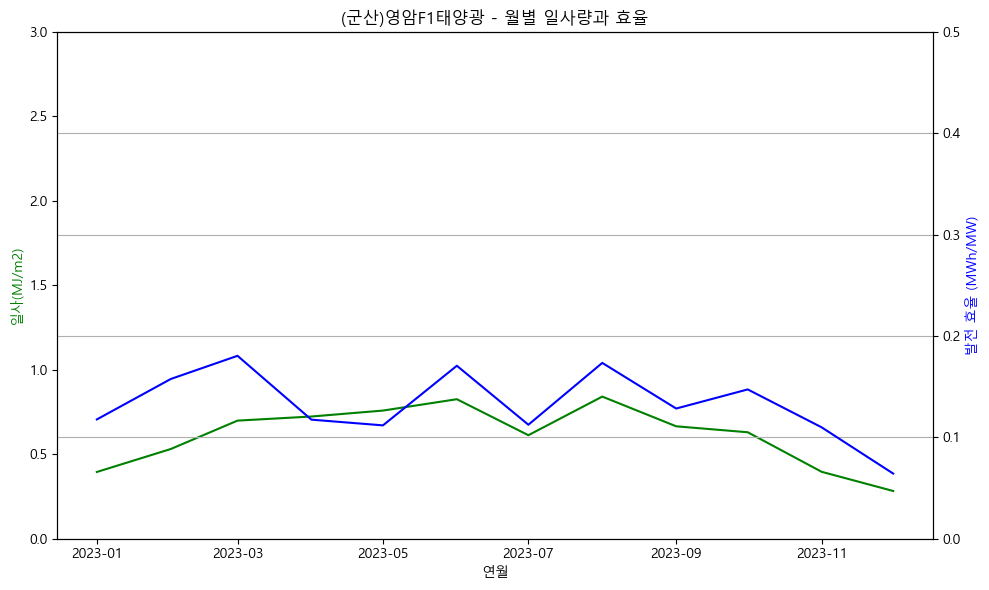

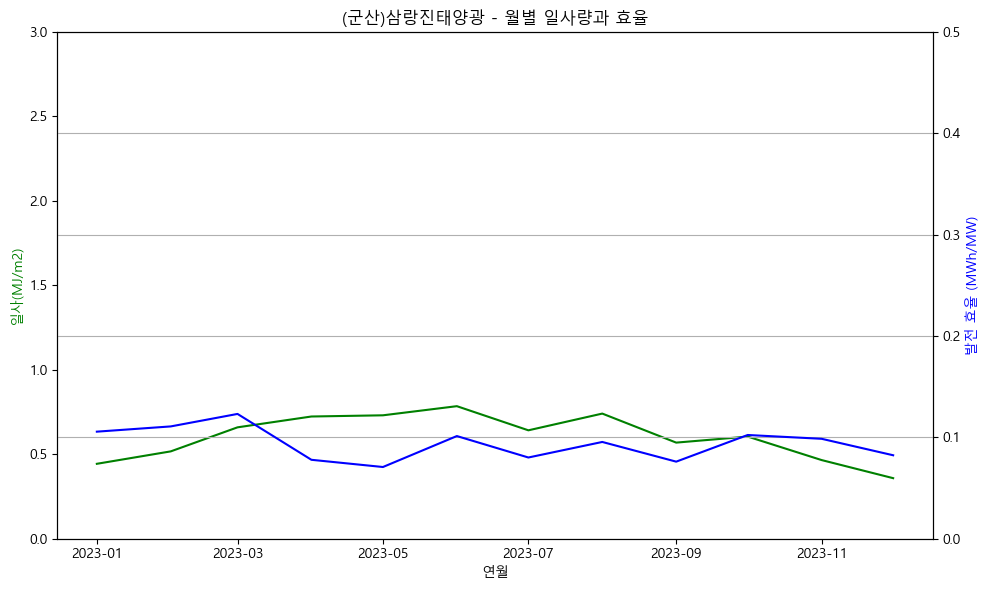

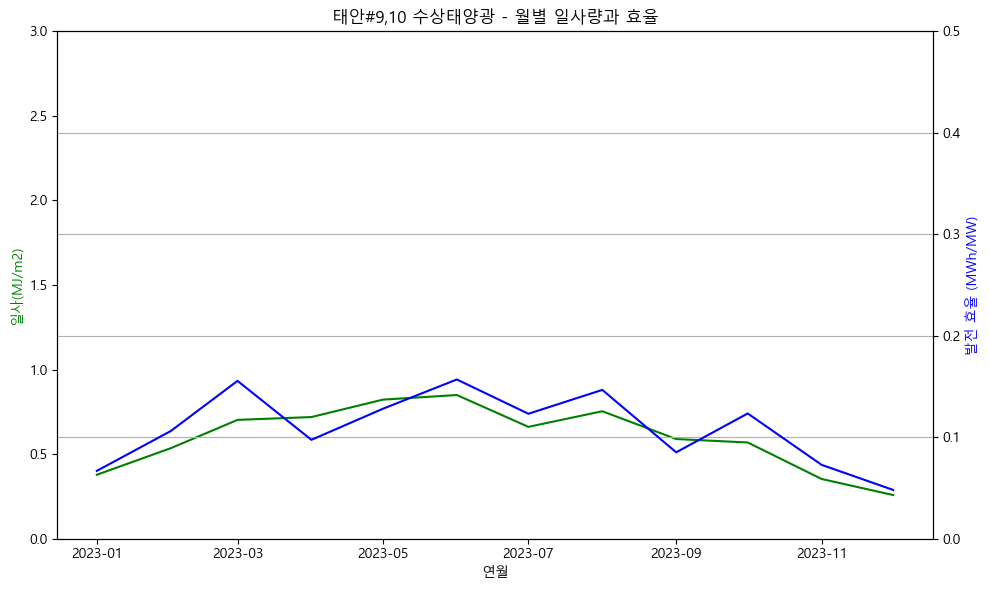

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ïó∞Ïõî Ï≤òÎ¶¨
df_merged['ÏùºÏûê'] = pd.to_datetime(df_merged['ÏùºÏûê'], errors='coerce')
df_merged['Ïó∞Ïõî'] = df_merged['ÏùºÏûê'].dt.to_period('M').astype(str)
df_merged['Ìö®Ïú®'] = df_merged['Î∞úÏ†ÑÎüâ(kWh)'] / df_merged['ÏÑ§ÎπÑÏö©Îüâ(MW)'] / 1000  # ‚ö†Ô∏è 1000ÏúºÎ°ú ÎÇòÎàî
df_merged = df_merged.dropna(subset=['Ìö®Ïú®', 'ÏùºÏÇ¨(MJ/m2)', 'Ïó∞Ïõî', 'Î∞úÏ†ÑÍµ¨Î∂Ñ'])

# Í≥†Ï†ïÎêú yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
ÌíçÏÜç_min, ÌíçÏÜç_max = 0, 3
Ìö®Ïú®_min, Ìö®Ïú®_max = 0, 0.5  # ‚ö†Ô∏è Ìö®Ïú® yÏ∂ïÎèÑ 0~5Î°ú Ï°∞Ï†ï

# Î∞úÏ†ÑÏÜå Î™©Î°ù
plants = df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'].unique()

# 3. Î∞úÏ†ÑÏÜåÎ≥Ñ Í∑∏ÎûòÌîÑ
for plant in plants:
    sub = df_merged[df_merged['Î∞úÏ†ÑÍµ¨Î∂Ñ'] == plant]
    if sub.empty:
        continue

    monthly = sub.groupby('Ïó∞Ïõî')[['ÏùºÏÇ¨(MJ/m2)', 'Ìö®Ïú®']].mean().reset_index()
    monthly['Ïó∞Ïõî'] = pd.to_datetime(monthly['Ïó∞Ïõî'])
    monthly = monthly.sort_values('Ïó∞Ïõî')

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax2 = ax1.twinx()

    ax1.plot(monthly['Ïó∞Ïõî'], monthly['ÏùºÏÇ¨(MJ/m2)'], 'g-', label='ÏùºÏÇ¨(MJ/m2)')
    ax2.plot(monthly['Ïó∞Ïõî'], monthly['Ìö®Ïú®'], 'b-', label='Î∞úÏ†Ñ Ìö®Ïú® (MWh/MW)')

    ax1.set_xlabel('Ïó∞Ïõî')
    ax1.set_ylabel('ÏùºÏÇ¨(MJ/m2)', color='g')
    ax2.set_ylabel('Î∞úÏ†Ñ Ìö®Ïú® (MWh/MW)', color='b')  # Îã®ÏúÑÎèÑ Î∞òÏòÅ

    ax1.set_ylim(ÌíçÏÜç_min, ÌíçÏÜç_max)
    ax2.set_ylim(Ìö®Ïú®_min, Ìö®Ïú®_max)

    plt.title(f'{plant} - ÏõîÎ≥Ñ ÏùºÏÇ¨ÎüâÍ≥º Ìö®Ïú®')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()
